Please ensure the `diabetic_data.csv` file has been uploaded to the root directory of your Colab environment for the path `/diabetic_data.csv` to be valid. You can upload it by clicking the folder icon on the left sidebar, then the 'Upload to session storage' icon.

In [6]:
df = pd.read_csv("/diabetic_data.csv")
display(df.head())

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,2273
gender,0
age,0
weight,98569
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

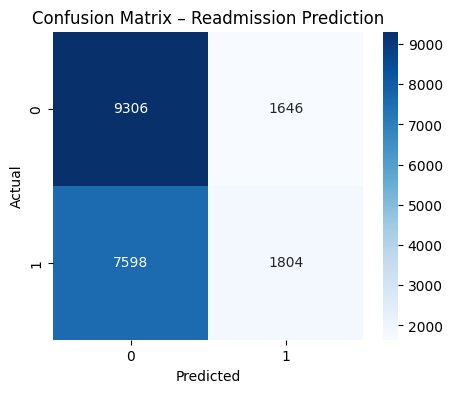

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure df is loaded (it is now after previous successful load)
df = pd.read_csv("/diabetic_data.csv")

# Replace '?' with NaN (as done previously)
df.replace('?', np.nan, inplace=True)

# Handle the readmitted column transformation (as done previously)
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x != 'NO' else 0)

# Define X and y, and perform train-test split (as done previously)
X = df[['time_in_hospital', 'num_procedures', 'num_medications']]
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model (as done previously)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Now generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Readmission Prediction')
plt.show()

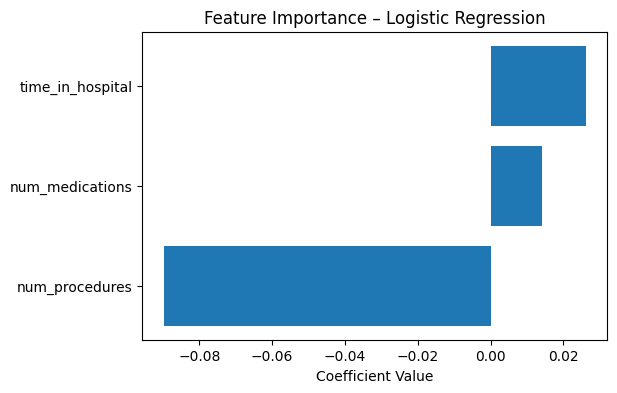

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=True)

plt.figure(figsize=(6,4))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance – Logistic Regression')
plt.show()

### **Important: Please ensure `diabetic_data.csv` is uploaded!**
Before running the next code cell, you *must* have uploaded the `diabetic_data.csv` file to the root directory of your Colab environment.

**Steps to Upload:**
1.  Click the **folder icon** (Files) on the left sidebar.
2.  Click the **'Upload to session storage' icon** (a page with an arrow pointing upwards) in the file browser.
3.  **Select your `diabetic_data.csv` file** from your local machine and upload it.

Once uploaded, it should be visible in the file browser. Then, you can run the following cell.

In [5]:
import pandas as pd
df = pd.read_csv("/diabetic_data.csv")
display(df.head())

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Please ensure the `diabetic_data.csv` file has been uploaded to your Colab environment, specifically into the `/content/` directory. You can upload it by clicking the folder icon on the left sidebar, then the 'Upload to session storage' icon.

In [4]:
import pandas as pd
df = pd.read_csv("/content/diabetic_data.csv")
display(df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/diabetic_data.csv'

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure df is loaded, and '?' replaced with NaN
df = pd.read_csv("/diabetic_data.csv")
df.replace('?', np.nan, inplace=True)

# Handle the readmitted column transformation
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x != 'NO' else 0)

# Define X and y, and perform train-test split
X = df[['time_in_hospital', 'num_procedures', 'num_medications']]
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Now generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Readmission Prediction')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/diabetic_data.csv'

In [1]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Readmission Prediction')
plt.show()

NameError: name 'y_test' is not defined

In [18]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

display(coefficients)

,Feature,Coefficient
0,time_in_hospital,0.026286
2,num_medications,0.014227
1,num_procedures,-0.089803


In [17]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.85      0.67     10952
           1       0.52      0.19      0.28      9402

    accuracy                           0.55     20354
   macro avg       0.54      0.52      0.47     20354
weighted avg       0.54      0.55      0.49     20354



In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


In [15]:
from sklearn.model_selection import train_test_split

X = df[['time_in_hospital', 'num_procedures', 'num_medications']]
y = df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (81412, 3)
Shape of X_test: (20354, 3)
Shape of y_train: (81412,)
Shape of y_test: (20354,)


In [14]:
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x != 'NO' else 0)
display(df['readmitted'].value_counts())

,count
readmitted,
0,54864
1,46902


In [13]:
df = pd.read_csv("/diabetic_data.csv")

# Re-apply the replacement of '?' with np.nan
df.replace('?', np.nan, inplace=True)

display(df.head())
print('\nNull values after reloading and replacing:')
display(df.isnull().sum())

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO



Null values after reloading and replacing:


,0
encounter_id,0
patient_nbr,0
race,2273
gender,0
age,0
weight,98569
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [12]:
df.dropna(inplace=True)

print('New DataFrame Shape after dropping nulls:', df.shape)
print('\nNull values remaining:')
display(df.isnull().sum())

New DataFrame Shape after dropping nulls: (0, 50)

Null values remaining:


,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [11]:
print('DataFrame Shape:', df.shape)
print('\nDataFrame Columns:')
display(df.columns)

DataFrame Shape: (101766, 50)

DataFrame Columns:


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')